In [4]:
!pip install tensorflow

  Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp312-cp312-win_amd64.whl.metadata (4.9 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.12.23-py2.py3-none-any.whl.metadata (876 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached grpcio-1.68.1-cp312-cp312-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.7.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached ml_dtypes-0.4.1-cp312-cp312-win_amd64.whl.metadata (20 kB)
  Using

In [5]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [2]:
from tensorflow.keras import layers, models, Input
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

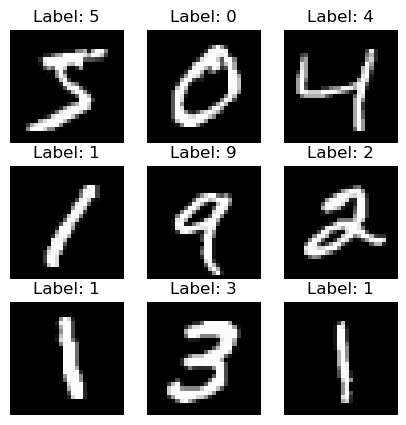

In [5]:
def plot_sample_images(images, labels, num_samples=9):
    plt.figure(figsize=(5, 5))
    for i in range(num_samples):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].squeeze(), cmap="gray")
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.show()
plot_sample_images(x_train, y_train)

In [6]:
model = models.Sequential([
    Input(shape=(28, 28, 1)),  
    layers.Conv2D(32, (3, 3), activation='relu'), 
    layers.MaxPooling2D((2, 2)), 
    layers.Conv2D(64, (3, 3), activation='relu'), 
    layers.MaxPooling2D((2, 2)),  
    layers.Flatten(),  
    layers.Dense(64, activation='relu'),  
    layers.Dense(10, activation='softmax')  
])

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.8954 - loss: 0.3409 - val_accuracy: 0.9832 - val_loss: 0.0590
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 43s 14ms/step - accuracy: 0.9839 - loss: 0.0512 - val_accuracy: 0.9887 - val_loss: 0.0437
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 39s 13ms/step - accuracy: 0.9890 - loss: 0.0350 - val_accuracy: 0.9900 - val_loss: 0.0375
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.9927 - loss: 0.0236 - val_accuracy: 0.9895 - val_loss: 0.0364
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.9947 - loss: 0.0169 - val_accuracy: 0.9885 - val_loss: 0.0398


In [9]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 50ms/step - accuracy: 0.9866 - loss: 0.0443
Test Accuracy: 0.99


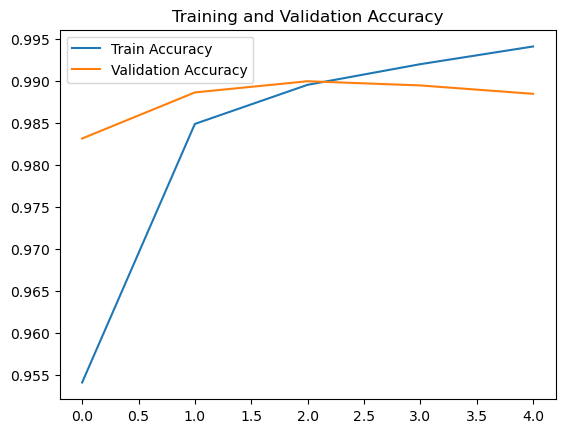

In [10]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step


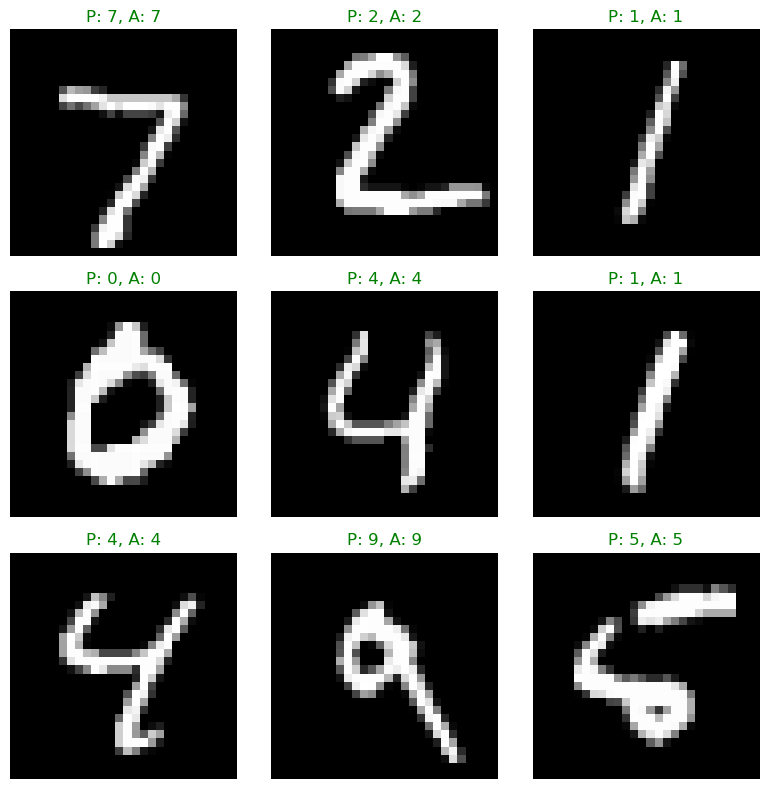

In [11]:
def display_predictions(images, labels, predictions, num_samples=9):
    plt.figure(figsize=(8, 8))
    for i in range(num_samples):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].squeeze(), cmap="gray")
        predicted_label = tf.argmax(predictions[i]).numpy()
        actual_label = labels[i]
        color = 'green' if predicted_label == actual_label else 'red'
        plt.title(f"P: {predicted_label}, A: {actual_label}", color=color)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

predictions = model.predict(x_test)
display_predictions(x_test, y_test, predictions, num_samples=9)

In [12]:
predicted_classes = tf.argmax(predictions, axis=1).numpy()
conf_matrix = confusion_matrix(y_test, predicted_classes)

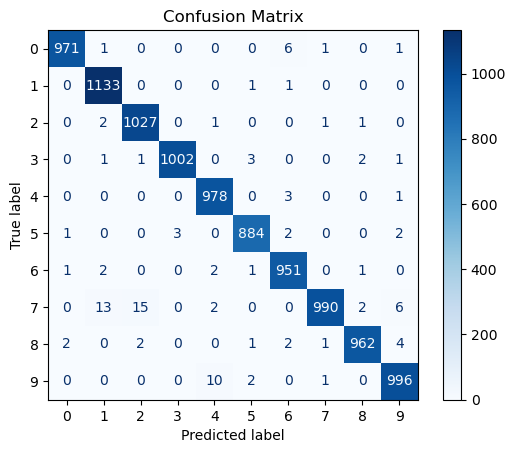

In [13]:
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.arange(10))
display.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()

In [14]:
def analyze_mispredictions(conf_matrix):
    mispredictions = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
    most_mispredicted_digit = np.argmax(mispredictions)
    print(f"Digit with most mispredictions: {most_mispredicted_digit}")
    print(f"Number of mispredictions: {mispredictions[most_mispredicted_digit]}")
    return most_mispredicted_digit

most_mispredicted_digit = analyze_mispredictions(conf_matrix)

Digit with most mispredictions: 7
Number of mispredictions: 38


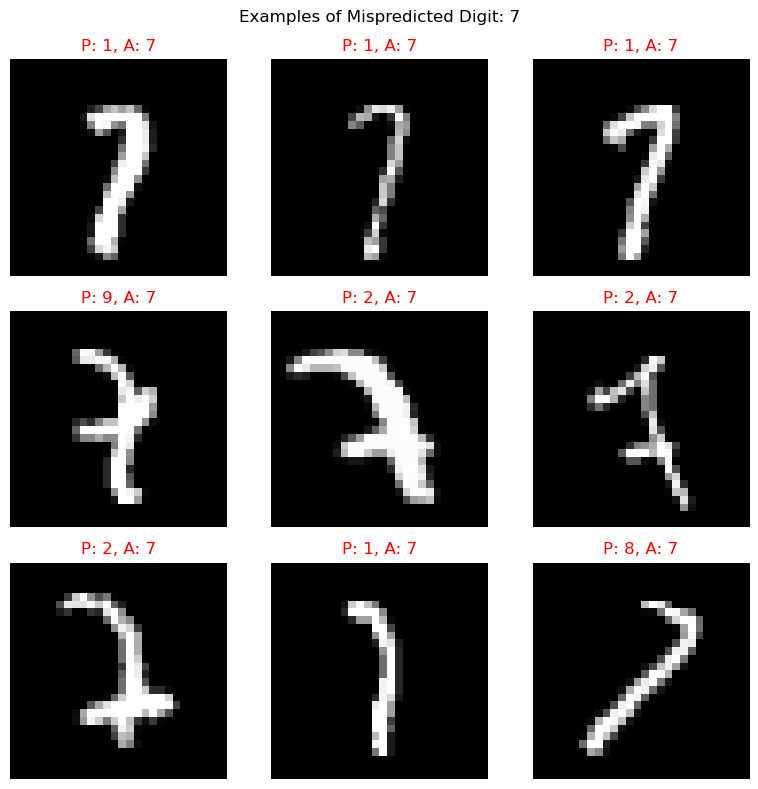

In [15]:
mispredicted_indices = [i for i, (true, pred) in enumerate(zip(y_test, predicted_classes)) 
                        if true == most_mispredicted_digit and true != pred]

plt.figure(figsize=(8, 8))
plt.suptitle(f"Examples of Mispredicted Digit: {most_mispredicted_digit}")
for i, index in enumerate(mispredicted_indices[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[index].squeeze(), cmap="gray")
    plt.title(f"P: {predicted_classes[index]}, A: {y_test[index]}", color='red')
    plt.axis('off')
plt.tight_layout()
plt.show()